In [3]:
import pandas as pd
import numpy as np
import sys, os , time, pickle
from tabulate import tabulate
import matplotlib.pyplot as plt

def find_match(string,list_des):
    return [value for value in list_des if string in value]

def plot_files(file_name):
    print("\nFile to show: ",file_name)
    table = pd.read_csv(folder+file_name)
    print(tabulate(table, headers='keys', tablefmt='rst')) #latex
    
methods_list = ["Ann(tr)","softMV","hardMV", "DS", "Raykar", "OursGlobal", "OursIndividual","OursIndividual2","OursIndividual3"]
methods_list_aux = ["soft-MV","hard-MV", "D&S", "Raykar", "Ours Global","Ours Individual","2", "3"]

def get_value(lista, name):
    return np.asarray([value[name][0] if type(value)== pd.DataFrame else -9999 for value in lista] )

def calculate_aux(archivo,what_to_do="mv",model=""):
    try:
        f = open(archivo)
        result_list = []
        for line in f.readlines():
            if what_to_do == "mv":
                if "ACC MV" in line: 
                    result_list.append(float(line.split(" ")[-1].strip()))
            elif what_to_do == 'epochs':
                if "Epochs to converge" in line and model in line: 
                    result_list.append(float(line.split(" ")[-1].strip()))
        f.close()
        return result_list
    except:
        return "-"
!ls

CIFAR  Plot_Results.ipynb  simple  simple_lambda  simple_lambda1  simple_softMV


In [24]:
!ls simple_lambda
folder = "simple_lambda/"
files = sorted(os.listdir(folder))

results_global.txt
results.txt
synthetic_DS_test.pickle
synthetic_DS_train.pickle
synthetic_hardMV_test.pickle
synthetic_hardMV_train.pickle
synthetic_OursGlobal_testAux.pickle
synthetic_OursGlobal_test.pickle
synthetic_OursGlobal_trainAnn.pickle
synthetic_OursGlobal_train.pickle
synthetic_OursIndividual2_testAux.pickle
synthetic_OursIndividual2_test.pickle
synthetic_OursIndividual2_trainAnn.pickle
synthetic_OursIndividual2_train.pickle
synthetic_OursIndividual3_testAux.pickle
synthetic_OursIndividual3_test.pickle
synthetic_OursIndividual3_trainAnn.pickle
synthetic_OursIndividual3_train.pickle
synthetic_OursIndividual_testAux.pickle
synthetic_OursIndividual_test.pickle
synthetic_OursIndividual_trainAnn.pickle
synthetic_OursIndividual_train.pickle
synthetic_Raykar_test.pickle
synthetic_Raykar_trainAnn.pickle
synthetic_Raykar_train.pickle
synthetic_softMV_test.pickle
synthetic_softMV_train.pickle
synthetic_UpperBound_test.csv
synthetic_UpperBound_train.csv


In [25]:
to_check = [100,500,1500,3500,6000,10000]

if 'simple' in folder.lower():
    T_data = 5 #for now is this..
    N = 2500
elif "cifar" in folder.lower():
    T_data = 3
    N = 50000
D_t = np.asarray([N*T_data/T for T in to_check])

In [26]:
with open(folder+'synthetic_softMV_train.pickle', 'rb') as handle:
    results_softmv_train = pickle.load(handle)
with open(folder+'synthetic_softMV_test.pickle', 'rb') as handle:
    results_softmv_test = pickle.load(handle)    
with open(folder+'synthetic_hardMV_train.pickle', 'rb') as handle:
    results_hardmv_train = pickle.load(handle)
with open(folder+'synthetic_hardMV_test.pickle', 'rb') as handle:
    results_hardmv_test =pickle.load(handle)
with open(folder+'synthetic_DS_train.pickle', 'rb') as handle:
    results_ds_train = pickle.load(handle)
with open(folder+'synthetic_DS_test.pickle', 'rb') as handle:
    results_ds_test = pickle.load(handle)
with open(folder+'synthetic_Raykar_train.pickle', 'rb') as handle:
    results_raykar_train = pickle.load(handle)
if "cifar" not in folder.lower():
    with open(folder+'synthetic_Raykar_trainAnn.pickle', 'rb') as handle:
        results_raykar_trainA = pickle.load(handle)
with open(folder+'synthetic_Raykar_test.pickle', 'rb') as handle:
    results_raykar_test = pickle.load(handle)
with open(folder+'synthetic_OursGlobal_train.pickle', 'rb') as handle:
    results_ours_global_train = pickle.load(handle)
if "cifar" not in folder.lower():
    with open(folder+'synthetic_OursGlobal_trainAnn.pickle', 'rb') as handle:
        results_ours_global_trainA =pickle.load(handle)
with open(folder+'synthetic_OursGlobal_test.pickle', 'rb') as handle:
    results_ours_global_test =pickle.load(handle)
with open(folder+'synthetic_OursGlobal_testAux.pickle', 'rb') as handle:
    results_ours_global_testA = pickle.load(handle)
    
with open(folder+'synthetic_OursIndividual_train.pickle', 'rb') as handle:
    results_ours_indiv_train = pickle.load(handle)
if "cifar" not in folder.lower():
    with open(folder+'synthetic_OursIndividual_trainAnn.pickle', 'rb') as handle:
        results_ours_indiv_trainA =pickle.load(handle)
with open(folder+'synthetic_OursIndividual_test.pickle', 'rb') as handle:
    results_ours_indiv_test =pickle.load(handle)
with open(folder+'synthetic_OursIndividual_testAux.pickle', 'rb') as handle:
    results_ours_indiv_testA = pickle.load(handle)
    
with open(folder+'synthetic_OursIndividual2_train.pickle', 'rb') as handle:
    results_ours_indiv2_train = pickle.load(handle)
if "cifar" not in folder.lower():
    with open(folder+'synthetic_OursIndividual2_trainAnn.pickle', 'rb') as handle:
        results_ours_indiv2_trainA =pickle.load(handle)
with open(folder+'synthetic_OursIndividual2_test.pickle', 'rb') as handle:
    results_ours_indiv2_test =pickle.load(handle)
with open(folder+'synthetic_OursIndividual2_testAux.pickle', 'rb') as handle:
    results_ours_indiv2_testA = pickle.load(handle)

with open(folder+'synthetic_OursIndividual3_train.pickle', 'rb') as handle:
    results_ours_indiv3_train = pickle.load(handle)
if "cifar" not in folder.lower():
    with open(folder+'synthetic_OursIndividual3_trainAnn.pickle', 'rb') as handle:
        results_ours_indiv3_trainA =pickle.load(handle)
with open(folder+'synthetic_OursIndividual3_test.pickle', 'rb') as handle:
    results_ours_indiv3_test =pickle.load(handle)
with open(folder+'synthetic_OursIndividual3_testAux.pickle', 'rb') as handle:
    results_ours_indiv3_testA = pickle.load(handle)
    

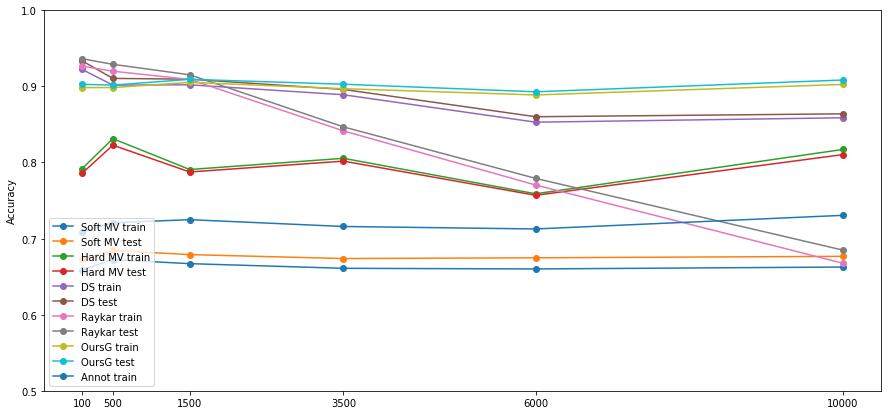

In [6]:
plt.figure(figsize=(15,7))
plt.plot(to_check, get_value(results_softmv_train,"Accuracy"), 'o-', label="Soft MV train")
plt.plot(to_check, get_value(results_softmv_test,"Accuracy"), 'o-',label="Soft MV test")

plt.plot(to_check, get_value(results_hardmv_train,"Accuracy"), 'o-',label="Hard MV train")
plt.plot(to_check, get_value(results_hardmv_test,"Accuracy"), 'o-',label="Hard MV test")

plt.plot(to_check, get_value(results_ds_train,"Accuracy"), 'o-',label="DS train")
plt.plot(to_check, get_value(results_ds_test,"Accuracy"), 'o-',label="DS test")


plt.plot(to_check, get_value(results_raykar_train,"Accuracy"), 'o-',label="Raykar train")
plt.plot(to_check, get_value(results_raykar_test,"Accuracy"), 'o-',label="Raykar test")

plt.plot(to_check, get_value(results_ours_global_train,"Accuracy"), 'o-',label="OursG train")
plt.plot(to_check, get_value(results_ours_global_test,"Accuracy"), 'o-',label="OursG test")

plt.plot(to_check,calculate_aux(folder+"results.txt",what_to_do="mv"), 'o-',label="Annot train")
plt.xticks(to_check)
plt.legend(loc="lower left")
plt.ylim(0.5,1)
plt.ylabel("Accuracy")
plt.show()

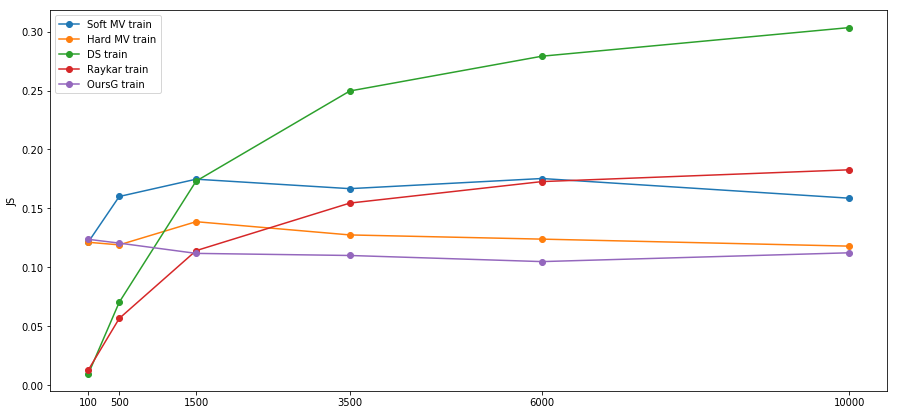

In [53]:

plt.figure(figsize=(15,7))
plt.plot(to_check, get_value(results_softmv_train,"Mean JS"), 'o-', label="Soft MV JS")
#plt.plot(to_check, get_value(results_softmv_test,"Accuracy"), 'o-',label="Soft MV test")

plt.plot(to_check, get_value(results_hardmv_train,"Mean JS"), 'o-',label="Hard MV JS")
#plt.plot(to_check, get_value(results_hardmv_test,"Accuracy"), 'o-',label="Hard MV test")

plt.plot(to_check, get_value(results_ds_train,"Mean JS"), 'o-',label="DS JS")
#plt.plot(to_check, get_value(results_ds_test,"Accuracy"), 'o-',label="DS test")

plt.plot(to_check, get_value(results_raykar_train,"Mean JS"), 'o-',label="Raykar JS")
#plt.plot(to_check, get_value(results_raykar_test,"Accuracy"), 'o-',label="Raykar test")

plt.plot(to_check, get_value(results_ours_global_train,"Mean JS"), 'o-',label="OursG JS")
#plt.plot(to_check, get_value(results_ours_global_test,"Accuracy"), 'o-',label="OursG test")

plt.xticks(to_check)
plt.legend(loc="upper left")
#plt.ylim(0.5,1)
plt.ylabel("JS")
plt.show()

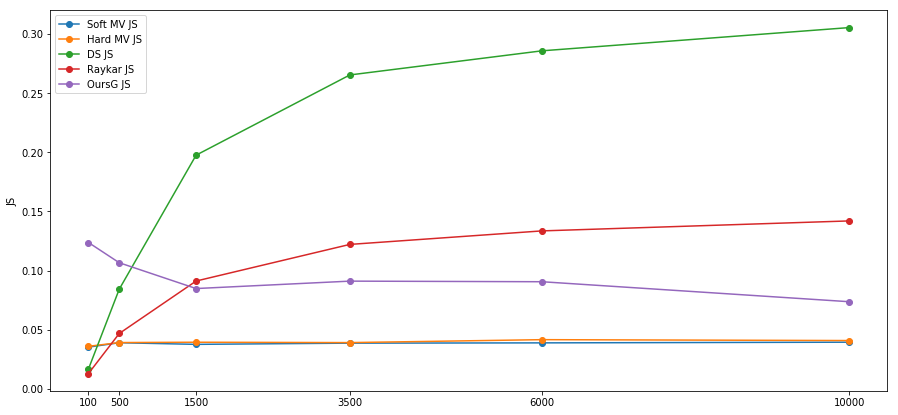

In [24]:

plt.figure(figsize=(15,7))
plt.plot(to_check, get_value(results_softmv_train,"(R) JS mean"), 'o-', label="Soft MV JS")
#plt.plot(to_check, get_value(results_softmv_test,"Accuracy"), 'o-',label="Soft MV test")

plt.plot(to_check, get_value(results_hardmv_train,"(R) JS mean"), 'o-',label="Hard MV JS")
#plt.plot(to_check, get_value(results_hardmv_test,"Accuracy"), 'o-',label="Hard MV test")

plt.plot(to_check, get_value(results_ds_train,"(R) JS mean"), 'o-',label="DS JS")
#plt.plot(to_check, get_value(results_ds_test,"Accuracy"), 'o-',label="DS test")

plt.plot(to_check, get_value(results_raykar_train,"(R) JS mean"), 'o-',label="Raykar JS")
#plt.plot(to_check, get_value(results_raykar_test,"Accuracy"), 'o-',label="Raykar test")

plt.plot(to_check, get_value(results_ours_global_train,"(R) JS mean"), 'o-',label="OursG JS")
#plt.plot(to_check, get_value(results_ours_global_test,"Accuracy"), 'o-',label="OursG test")

plt.xticks(to_check)
plt.legend(loc="upper left")
#plt.ylim(0.5,1)
plt.ylabel("JS")
plt.show()

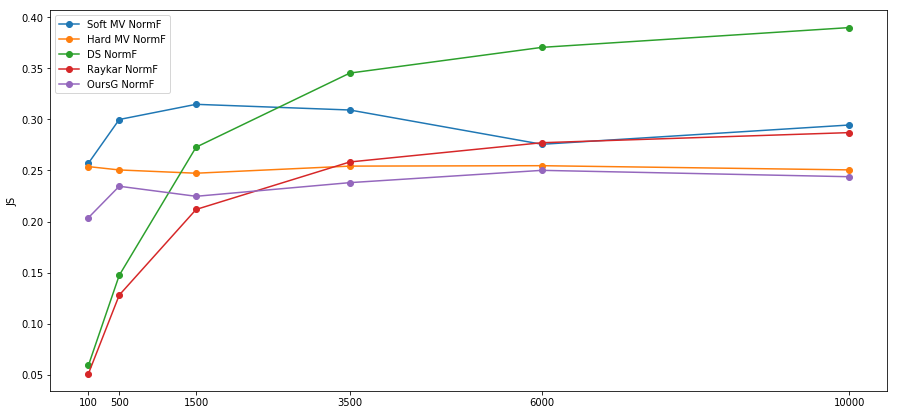

In [9]:

plt.figure(figsize=(15,7))
#plt.plot(to_check, get_value(results_softmv_train,"Mean JS"), 'o-', label="Soft MV JS")
plt.plot(to_check, get_value(results_softmv_train,"Mean NormF"), 'o-',label="Soft MV NormF")

#plt.plot(to_check, get_value(results_hardmv_train,"Mean JS"), 'o-',label="Hard MV JS")
plt.plot(to_check, get_value(results_hardmv_train,"Mean NormF"), 'o-',label="Hard MV NormF")

#plt.plot(to_check, get_value(results_ds_train,"Mean JS"), 'o-',label="DS JS")
plt.plot(to_check, get_value(results_ds_train,"Mean NormF"), 'o-',label="DS NormF")

#plt.plot(to_check, get_value(results_raykar_train,"Mean JS"), 'o-',label="Raykar JS")
plt.plot(to_check, get_value(results_raykar_train,"Mean NormF"), 'o-',label="Raykar NormF")

#plt.plot(to_check, get_value(results_ours_global_train,"Mean JS"), 'o-',label="OursG JS")
plt.plot(to_check, get_value(results_ours_global_train,"Mean NormF"), 'o-',label="OursG NormF")

plt.xticks(to_check)
plt.legend(loc="upper left")
#plt.ylim(0.5,1)
plt.ylabel("JS")
plt.show()

In [19]:
results_ours_global_testA

[   Groups      Prob       T(g)   Entropy  Diag mean  Isim (JS)   Spammer  \
 0     0.0  0.145330  14.000000  0.400901   0.580479   0.511659  0.370718   
 1     1.0  0.701153  69.633333  0.244663   0.935448   0.951705  0.903172   
 2     2.0  0.153517  14.900000  0.374611   0.541833   0.447405  0.312750   
 
     Iner JS  Iner NormF  Accuracy  F1 (micro)  
 0  0.263657    0.428142  0.587953    0.587953  
 1  0.263657    0.428142  0.886203    0.886203  
 2  0.263657    0.428142  0.365405    0.365405  ,
    Groups      Prob        T(g)   Entropy  Diag mean  Isim (JS)   Spammer  \
 0     0.0  0.151112   74.966667  0.389670   0.576687   0.506813  0.365031   
 1     1.0  0.722928  361.066667  0.293704   0.913894   0.934640  0.870842   
 2     2.0  0.125960   62.433333  0.393028   0.539649   0.451850  0.309473   
 
     Iner JS  Iner NormF  Accuracy  F1 (micro)  
 0  0.237892    0.412431  0.603134    0.603134  
 1  0.237892    0.412431  0.879080    0.879080  
 2  0.237892    0.412431  0.3670

In [27]:
def create_df(method_l,T_try,value,file_re = "results.txt"):
    t = pd.DataFrame(np.zeros((len(method_l),len(T_try))))
    t.columns = T_try
    t.index = method_l
    if value.lower() == "accuracy" or "F1" in value.lower():
        if len(calculate_aux(folder+file_re,what_to_do="mv")) > len(T_try) +1:
            aux2 = calculate_aux(folder+file_re,what_to_do="mv")
            aux = [np.mean(aux2[i:30*(i+1)]) for i in range(0,len(aux2),30)]
        else:
            aux = calculate_aux(folder+file_re,what_to_do="mv")
        #print(aux)
        t.loc["Ann(tr)",:] = aux
        t.loc["softMV",:] = get_value(results_softmv_test,value)
        t.loc["hardMV",:] = get_value(results_hardmv_test,value)
        t.loc["DS",:] = get_value(results_ds_test,value)
        t.loc["Raykar",:] = get_value(results_raykar_test,value)
        t.loc["OursGlobal",:] = get_value(results_ours_global_test,value)
        t.loc["OursIndividual",:] = get_value(results_ours_indiv_test,value)
        t.loc["OursIndividual2",:] = get_value(results_ours_indiv2_test,value)
        t.loc["OursIndividual3",:] = get_value(results_ours_indiv3_test,value)
    elif "inertia" in value.lower() or "iner" in value.lower():
        t.loc["OursGlobal",:] = get_value(results_ours_global_testA,value)
        t.loc["OursIndividual",:] = get_value(results_ours_indiv_testA,value)
    else:
        t.index = ["D_t"]+method_l[1:]
        t.loc["D_t",:] = D_t
        t.loc["softMV",:] = get_value(results_softmv_train,value)
        t.loc["hardMV",:] = get_value(results_hardmv_train,value)
        t.loc["DS",:] = get_value(results_ds_train,value)
        t.loc["Raykar",:] = get_value(results_raykar_train,value)
        t.loc["OursGlobal",:] = get_value(results_ours_global_train,value)
        t.loc["OursIndividual",:] = get_value(results_ours_indiv_train,value)
        t.loc["OursIndividual2",:] = get_value(results_ours_indiv2_train,value)
        t.loc["OursIndividual3",:] = get_value(results_ours_indiv3_train,value)
    return t.round(4)

In [28]:
t = create_df(methods_list,to_check,"Accuracy")
t

,100,500,1500,3500,6000,10000
Ann(tr),0.7346,0.7346,0.7241,0.7277,0.7037,0.7265
softMV,0.7200,0.7084,0.6875,0.7028,0.6629,0.6552
hardMV,0.8466,0.8588,0.8024,0.7967,0.7310,0.7654
DS,0.9466,0.9389,0.9228,0.9169,0.8969,0.8513
Raykar,0.9397,0.9399,0.9218,0.8827,0.7647,0.6701
OursGlobal,0.9243,0.9206,0.9165,0.9066,0.9110,0.9093
OursIndividual,0.9438,0.9425,0.9177,0.8606,0.9468,0.7880
OursIndividual2,0.9245,0.8992,0.7000,0.7463,0.9504,0.7844
OursIndividual3,0.9449,0.9457,0.9397,0.9210,0.8011,0.6906


In [29]:
t = create_df(methods_list,to_check,"(R) JS mean")
#t = create_df(methods_list,to_check,"(R) NormF mean")
t

,100,500,1500,3500,6000,10000
D_t,125.0000,25.0000,8.3333,3.5714,2.0833,1.2500
softMV,0.0844,0.0880,0.0880,0.0884,0.0874,0.0866
hardMV,0.0823,0.0868,0.0881,0.0883,0.0880,0.0861
DS,0.0104,0.0663,0.1801,0.2571,0.2850,0.3075
Raykar,0.0141,0.0549,0.1166,0.1554,0.1735,0.1839
OursGlobal,0.0889,0.1098,0.1077,0.1078,0.1089,0.1083
OursIndividual,0.0348,0.0339,0.0615,0.0867,0.1122,0.1394
OursIndividual2,0.0208,0.0352,0.1302,0.1468,0.2030,0.2372
OursIndividual3,0.0158,0.0197,0.0511,0.0913,0.1517,0.2246


In [19]:
t = create_df(methods_list,to_check,"(G) JS")
t = create_df(methods_list,to_check,"(G) NormF")
t

,100,500,1500,3500,6000,10000
D_t,125.0000,25.0000,8.3333,3.5714,2.0833,1.2500
softMV,0.0632,0.0696,0.0654,0.0698,0.0668,0.0684
hardMV,0.0809,0.0883,0.0887,0.0947,0.0964,0.0929
DS,0.0035,0.0177,0.0345,0.0866,0.1135,0.1402
Raykar,0.0187,0.0749,0.1448,0.1956,0.2110,0.2205
OursGlobal,0.1380,0.1633,0.1552,0.1627,0.1597,0.1684
OursIndividual,0.1568,0.1463,0.1408,0.0599,0.0716,0.0629


In [17]:
print(tabulate(t,headers='keys',tablefmt='latex'))

\begin{tabular}{lrrrrrr}
\hline
            &      100 &     500 &   1500 &   3500 &   6000 &   10000 \\
\hline
 D\_t        & 125      & 25      & 8.3333 & 3.5714 & 2.0833 &  1.25   \\
 softMV     &   0.0632 &  0.0696 & 0.0654 & 0.0698 & 0.0668 &  0.0684 \\
 hardMV     &   0.0809 &  0.0883 & 0.0887 & 0.0947 & 0.0964 &  0.0929 \\
 DS         &   0.0035 &  0.0177 & 0.0345 & 0.0866 & 0.1135 &  0.1402 \\
 Raykar     &   0.0187 &  0.0749 & 0.1448 & 0.1956 & 0.211  &  0.2205 \\
 OursGlobal &   0.1822 &  0.1783 & 0.1709 & 0.1862 & 0.1626 &  0.1669 \\
            &   0      &  0      & 0      & 0      & 0      &  0      \\
\hline
\end{tabular}


In [10]:
t = create_df(methods_list,to_check,"Iner JS")
t = create_df(methods_list,to_check,"Iner NormF")

t

,100,500,1500,3500,6000,10000
Ann(tr),0.0000,0.0000,0.0000,0.0000,0.0000,0.00
softMV,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
hardMV,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
DS,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
Raykar,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
OursGlobal,0.3799,0.2996,0.3719,0.4015,0.3668,0.36
,0.0000,0.0000,0.0000,0.0000,0.0000,0.00
